# Application example: scheduling of industrial processes. 

The current form of electricity markets allows for dynamic electricity pricing schemes, which therefore can be exploited by the industry. The accurate DAM price forecasting is a useful tool for manufacturing companies that have a flexible scheduling scheme, offering them a potential reduction of energy costs. The economic benefit originates from the Demand side Management. Industry can adjust its energy consumption by synchronizing production planning with the respected electricity price forecast. Due to the high volatility of the price, accurate forecasts offer big opportunities for minimizing not only electricity costs, but also possible penalty costs from the extensive usage of non-renewable energy sources or Co2 emissions. 

In this section, the mathematical formulation of the application example of scheduling process for an industrial facility is given on a day-ahead scheduling horizon. The energy cost is reflected by integrating the DAM price in which the industry procures energy for covering its needs. A simplified architecture showing the integration of the forecasting tool in the optimization process is depicted in the picture above. The forecasted DAM price is given as an input to the optimization problem for determining the optimal schedule. The solution is then implemented in the industrial facility with respect to the operational constraints. Finally, for the calculation of the real costs the actual DAM price is considered.

In the figures below, firstly the energy cost per quarter are presented, which is followed by a more complex thus informative figure. It shows the price(actual or forecasted) over the quarters, and also the respected Co2 emmisions and the percentage of the renewable energy integrated to the network this time period, both scaled for visualazation purposes. Finally, the periods that the respective machine is on are plotted. 

Our purpose is to minimiaze the difference between the actual cost, using the forecasted price and the actual price to schedule machine's operations. Even if the forecasts are not that accurate, the goal is to optimize the scheduler. In more details, capturing the general trend of the electricity price.

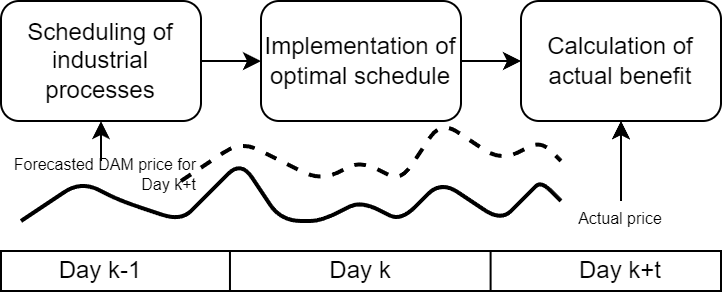

In [1]:
#load image in jupyter
from IPython.display import Image
Image(filename='Scheduler.png')



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
%load_ext autoreload
%autoreload all
from helper import *
from time_analysis import *
%autoreload
%aimport time_analysis
from __init__ import root_dir, data_path
plt.rcParams["figure.figsize"] = (5,3)

import os


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
# changing the files' path
book0=pd.read_csv(os.path.join(data_path,'clean\load_engine1.csv'),header=None)*0.000001#Load in MWh
book1=pd.read_csv(os.path.join(data_path,'clean\load_engine2.csv'),header=None)*0.000001#Load in MWh
price_a = pd.read_csv(os.path.join(data_path,'clean\data.csv'),delimiter=';',decimal=",",header=None).astype(float)#price data
price_f = pd.read_csv(os.path.join(data_path,'clean\data_forecasted.csv'),delimiter=';',decimal=",",header=None).astype(float)#forecasted price data
dfemi = pd.read_csv(os.path.join(data_path,'clean\data_Total_CO2_emissions.csv'),delimiter=';',decimal=",",header=None).astype(float)#emissions data
dfren = pd.read_csv(os.path.join(data_path,'clean\data_Renew_perc.csv'),delimiter=';',decimal=",",header=None).astype(float)#renewable data percentage



def read_txt(file):
    df=pd.read_csv(file,header=None)
    return df
df=read_txt(os.path.join(data_path,'clean\output_forecast.txt'))#read the output of the scheduler with continuous operation of the machine-forecasted price
dfa=read_txt(os.path.join(data_path,'clean\output_actua.txt'))#read the output of the scheduler with continuous operation of the machine-actual price
dfi=read_txt(os.path.join(data_path,'clean\output_for_ind.txt'))#read the output of the scheduler with individual task operation of the machine-forecasted price
dfai=read_txt(os.path.join(data_path,'clean\output_actua_ind.txt'))#read the output of the scheduler with individual task operation of the machine-actual price


df0=df.T
df0a=dfa.T
df0i=dfi.T
df0ai=dfai.T


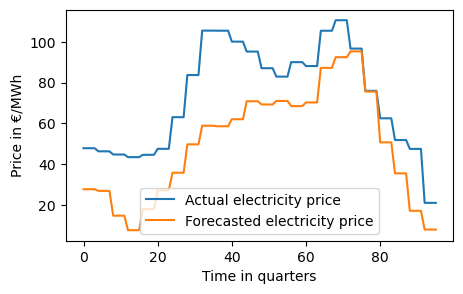

In [37]:
plt.plot(price_a,label="Actual electricity price")
plt.plot(price_f,label="Forecasted electricity price")
plt.legend()
plt.xlabel('Time in quarters')
plt.ylabel('Price in €/MWh')
plt.show()

Forecasted cost of the forecasted schedule
Total energy cost of machine1 89294.77046340998
Total energy cost of machine2 122157.77192691


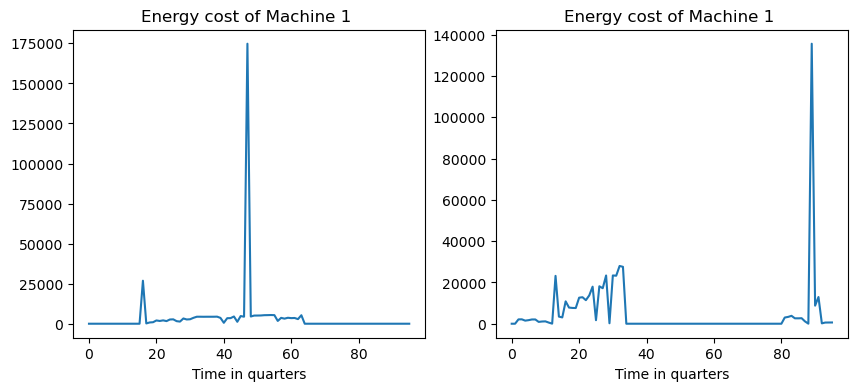

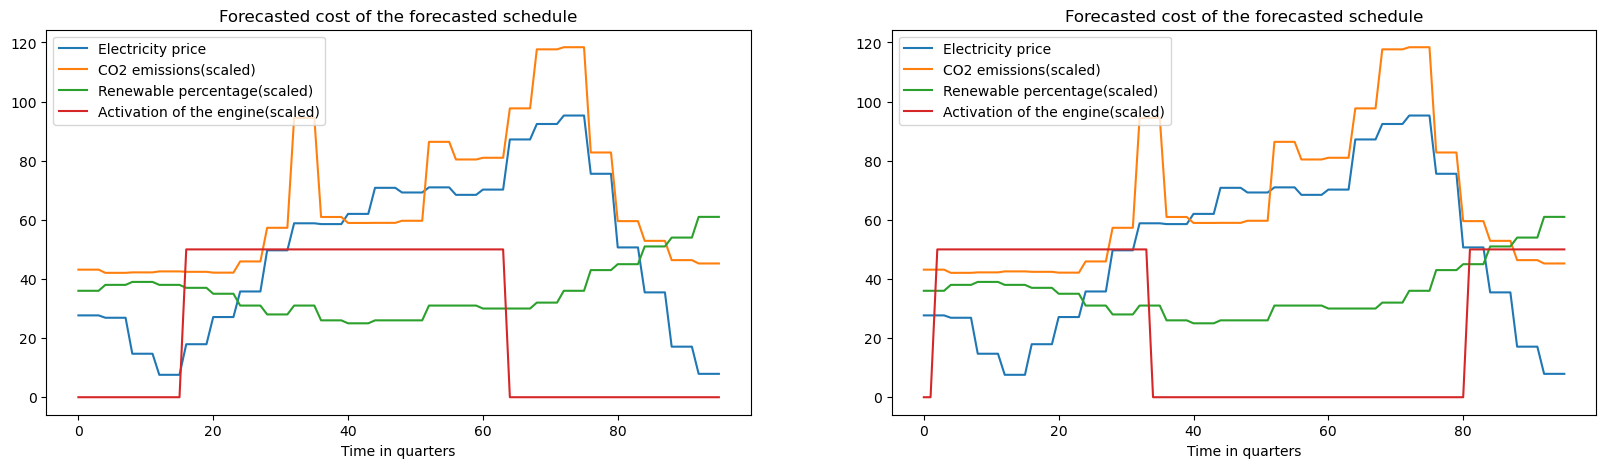

Actual cost of the forecasted schedule
Total energy cost of machine1 133761.624305265
Total energy cost of machine2 289096.5943335375


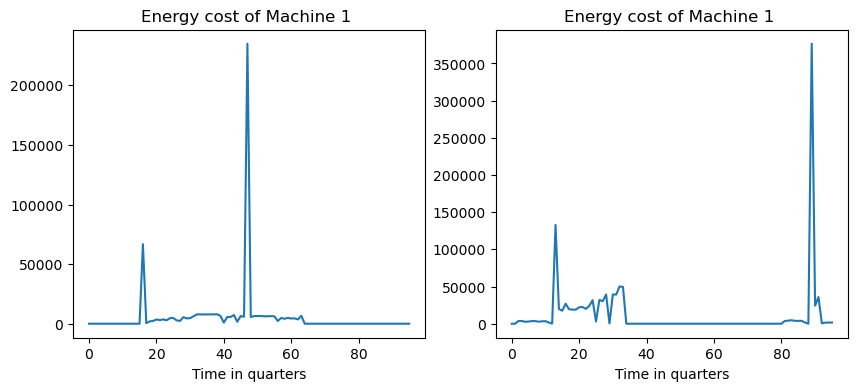

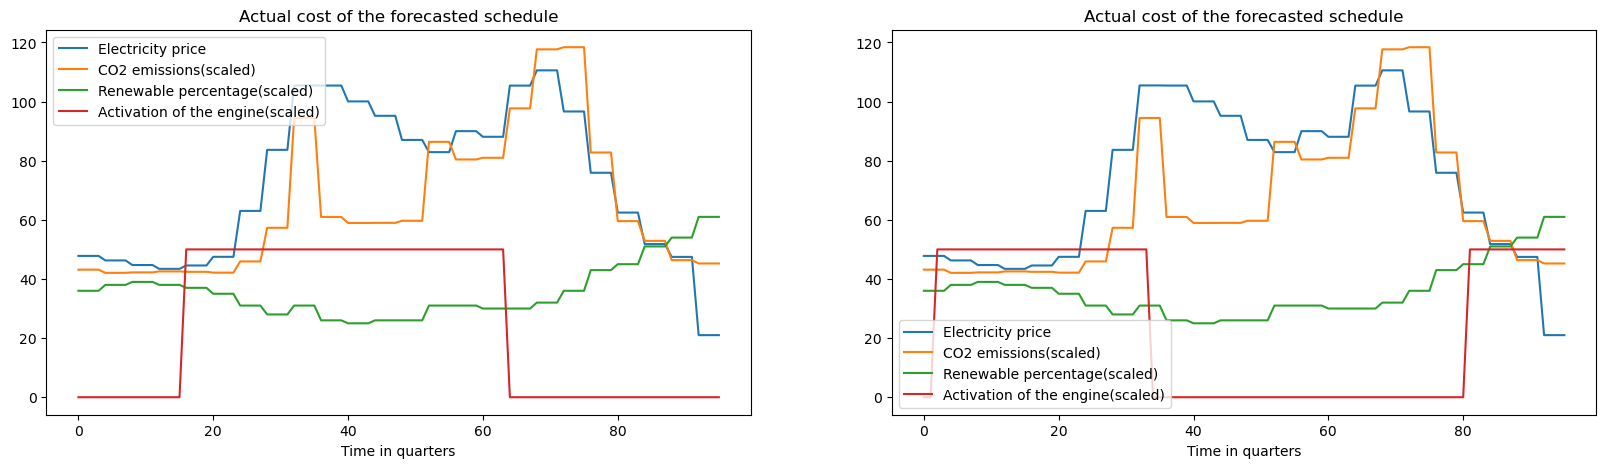

Actual cost of the actual schedule
Total energy cost of machine1 131038.29391035
Total energy cost of machine2 281512.7605849699


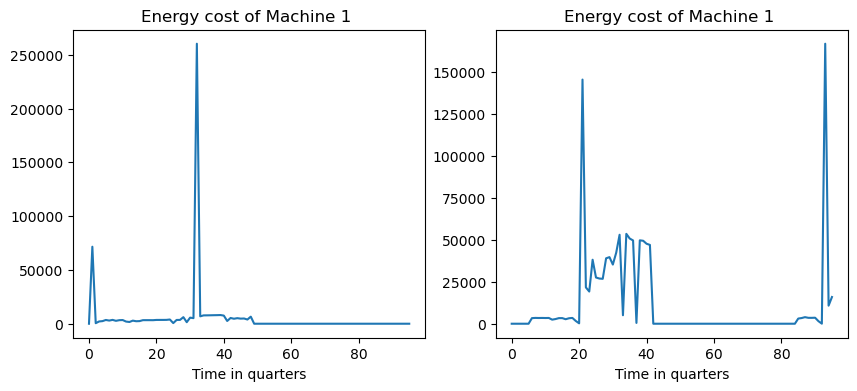

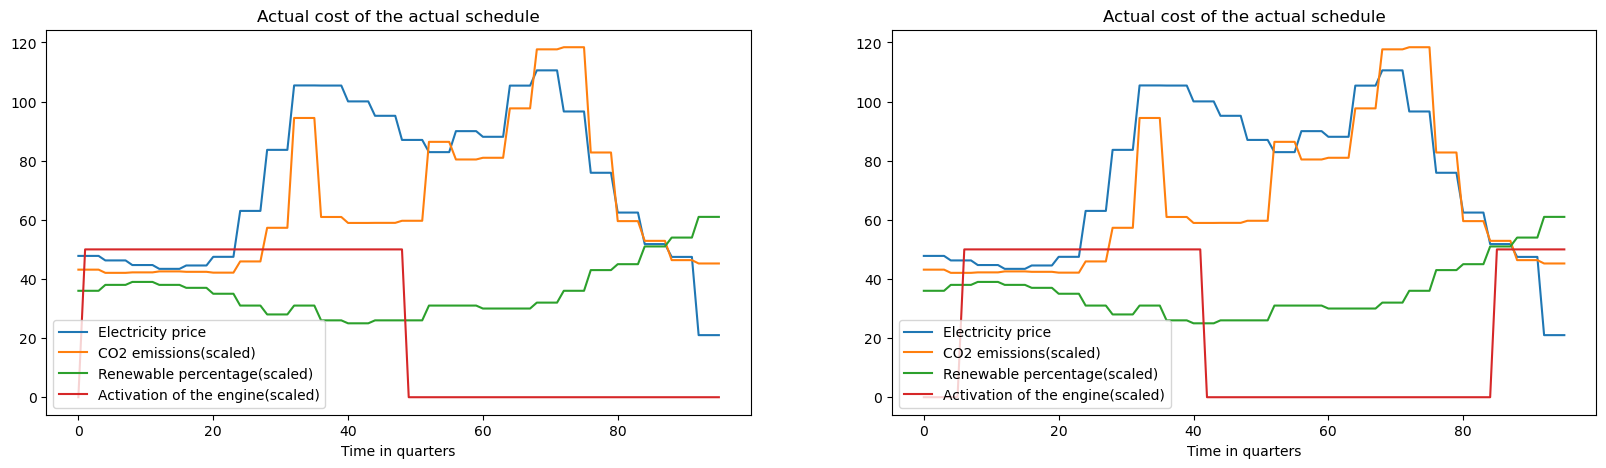

In [38]:

plots(price_f,df0,2,book0,book1,"Forecasted cost of the forecasted schedule",dfemi,dfren)
plots(price_a,df0,2,book0,book1,"Actual cost of the forecasted schedule",dfemi,dfren)
plots(price_a,df0a,2,book0,book1,"Actual cost of the actual schedule",dfemi,dfren)


Forecasted cost of the forecasted schedule
Total energy cost of machine1 29974.188847362504
Total energy cost of machine2 67793.8019934925


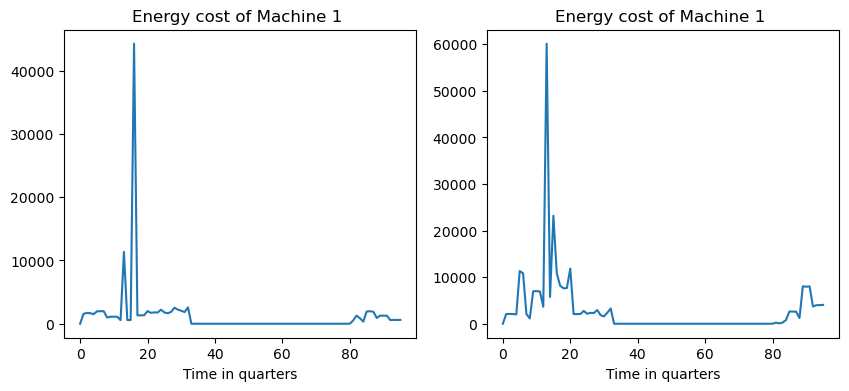

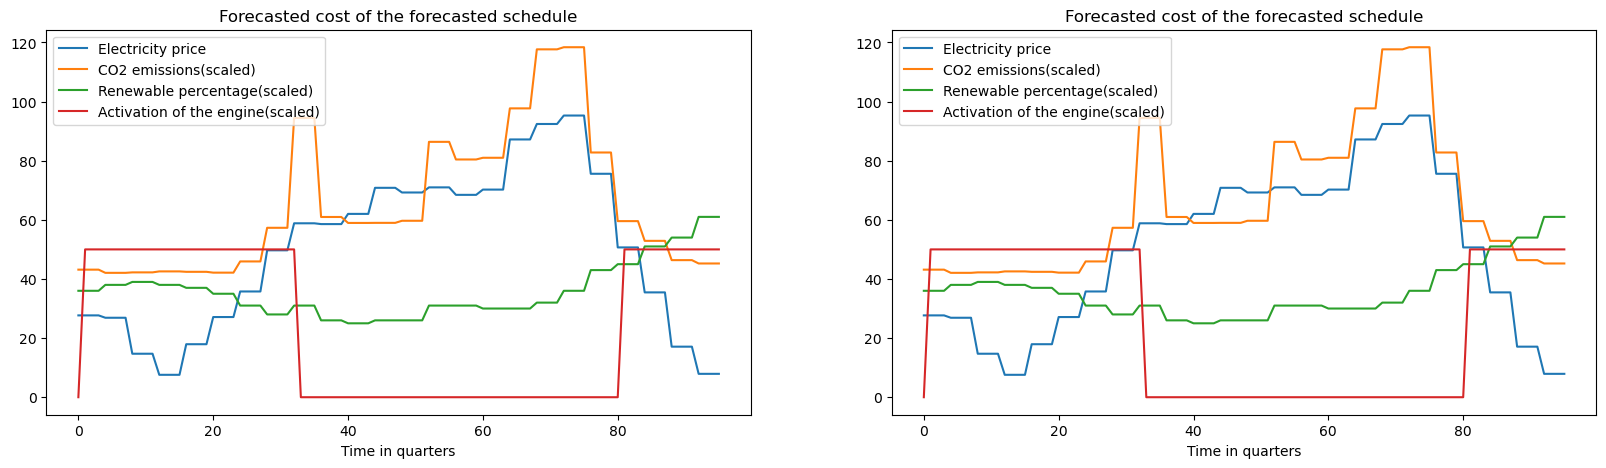

Actual cost of the forecasted schedule
Total energy cost of machine1 76505.4590926
Total energy cost of machine2 233248.09234546754


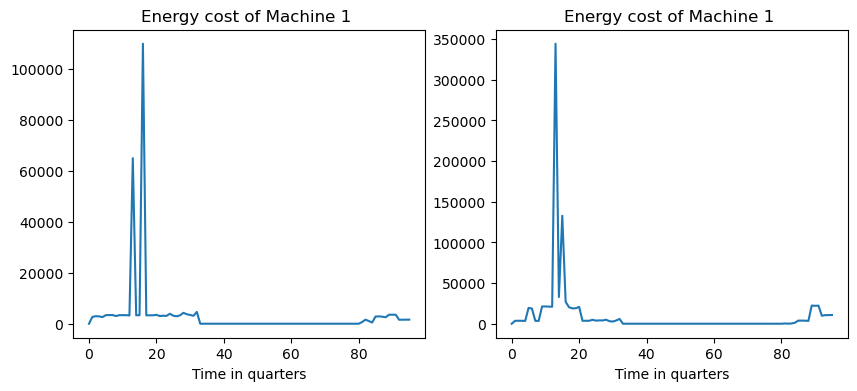

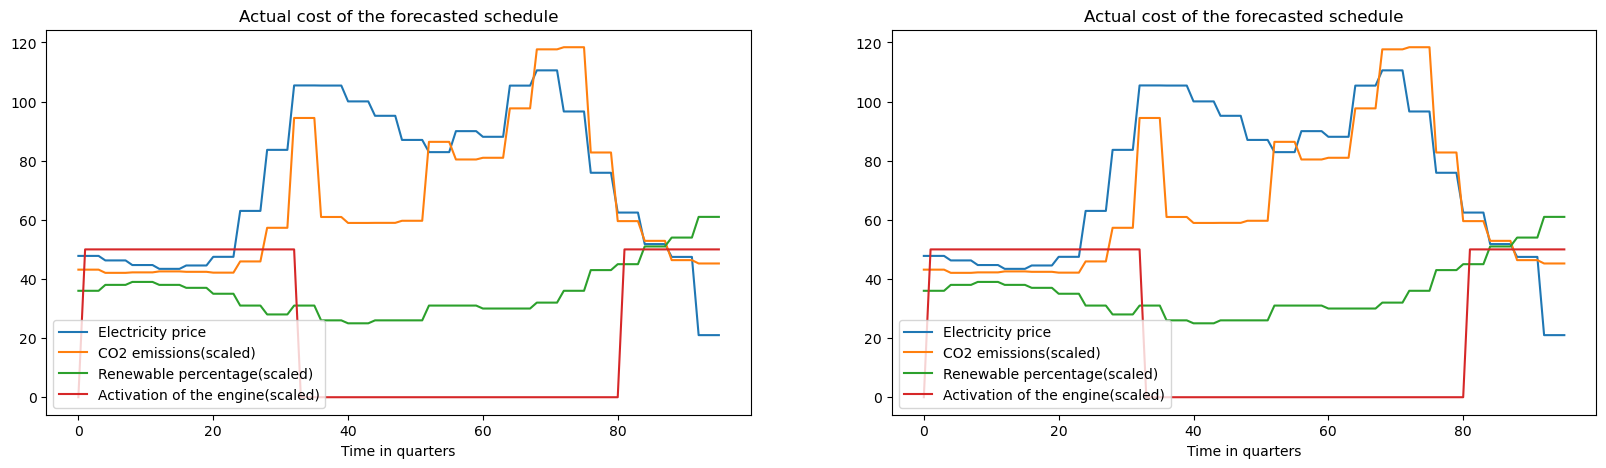

Actual cost of the actual schedule
Total energy cost of machine1 53355.37890728749
Total energy cost of machine2 172726.71441902505


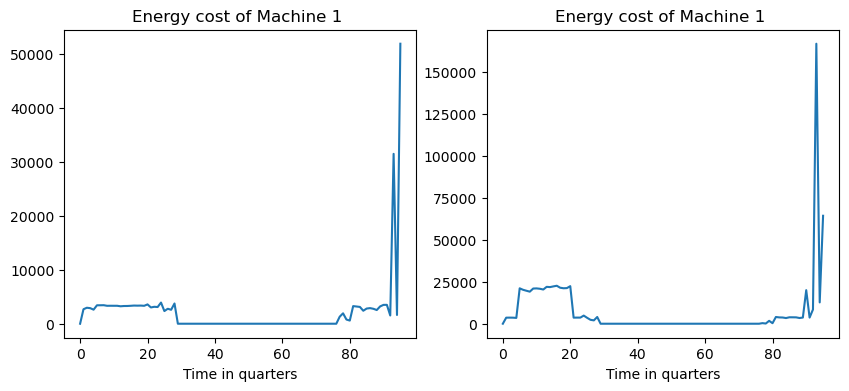

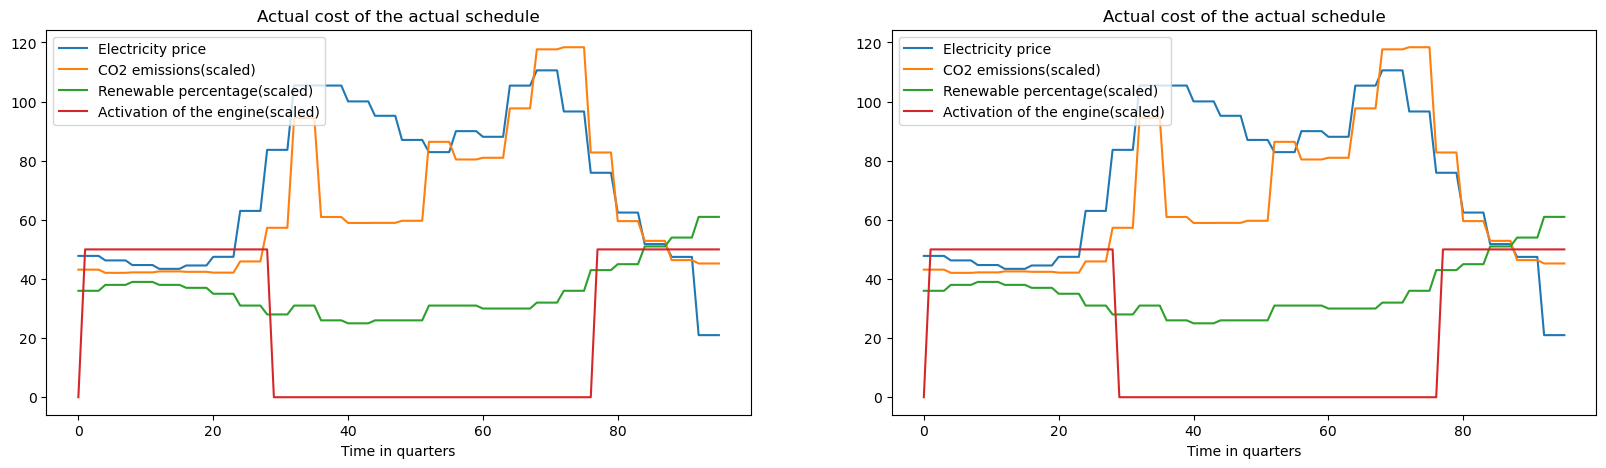

In [40]:
plots(price_f,df0i,2,book0,book1,"Forecasted cost of the forecasted schedule",dfemi,dfren)
plots(price_a,df0i,2,book0,book1,"Actual cost of the forecasted schedule",dfemi,dfren)
plots(price_a,df0ai,2,book0,book1,"Actual cost of the actual schedule",dfemi,dfren)